# SimpleRegression

In [31]:
# import libraries

import torch
import matplotlib
import seaborn
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Loading data¶
Source: https://www.kaggle.com/jemishdonda/headbrain

In [32]:
size_weight_data = pd.read_csv('datasets/headbrain.csv')

size_weight_data.head(10)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [33]:
size_weight_data.shape

(237, 4)

In [34]:
size_weight_data.drop(['Gender', 'Age Range'], axis=1, inplace=True)

size_weight_data.columns

Index(['Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

## Renaming columns

In [35]:
size_weight_data = size_weight_data.rename(columns={'Head Size(cm^3)' : 'Head Size',
                                                    'Brain Weight(grams)' : 'Brain Weight'})

In [36]:
size_weight_data.head()

,Head Size,Brain Weight
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590


## Visualizing dataset

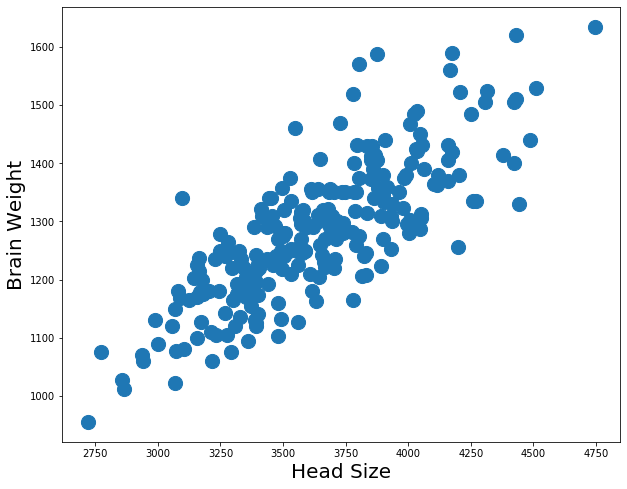

In [37]:
plt.figure(figsize=(10, 8))

plt.scatter(size_weight_data['Head Size'], size_weight_data['Brain Weight'], s=200)

plt.xlabel('Head Size', fontsize=20)
plt.ylabel('Brain Weight', fontsize=20)

plt.show()

In [38]:
x_train, x_test, y_train, y_test = train_test_split(size_weight_data[['Head Size']],
                                                   size_weight_data[['Brain Weight']],
                                                   test_size = 0.2, random_state = 1)

In [39]:
x_train.shape, y_train.shape

((189, 1), (189, 1))

In [40]:
x_test.shape, y_test.shape

((48, 1), (48, 1))

In [41]:
x_train.describe()

,Head Size
count,189.000000
mean,3622.841270
std,361.195262
min,2720.000000
25%,3381.000000
50%,3609.000000
75%,3858.000000
max,4747.000000


In [42]:
standardScaler_x = StandardScaler()

standardScaler_x.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
x_train = pd.DataFrame(standardScaler_x.transform(x_train))

x_train.describe()

,0
count,1.890000e+02
mean,-9.780536e-17
std,1.002656e+00
min,-2.506232e+00
25%,-6.713366e-01
50%,-3.842252e-02
75%,6.527863e-01
max,3.120596e+00


In [44]:
standardScaler_y = StandardScaler()

standardScaler_y.fit(y_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [45]:
y_train = pd.DataFrame(standardScaler_y.transform(y_train))

y_train.describe()

,0
count,1.890000e+02
mean,7.988906e-16
std,1.002656e+00
min,-2.720822e+00
25%,-6.348438e-01
50%,-9.050276e-03
75%,5.750236e-01
max,2.953039e+00


In [46]:
x_test = pd.DataFrame(standardScaler_x.transform(x_test))

x_test.describe()

,0
count,48.000000
mean,0.152828
std,1.059236
min,-2.106497
25%,-0.637331
50%,0.151729
75%,0.774234
max,2.273935


In [47]:
standardScaler_y = StandardScaler()

standardScaler_y.fit(y_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [48]:
y_train = pd.DataFrame(standardScaler_y.transform(y_train))

y_train.describe()

,0
count,1.890000e+02
mean,-3.935711e-17
std,1.002656e+00
min,-2.720822e+00
25%,-6.348438e-01
50%,-9.050276e-03
75%,5.750236e-01
max,2.953039e+00


In [49]:
y_test = pd.DataFrame(standardScaler_y.transform(y_test))

y_test.describe()

,0
count,48.000000
mean,1289.916667
std,122.041296
min,1012.000000
25%,1213.000000
50%,1280.000000
75%,1380.000000
max,1590.000000


## Converting values into tensors

In [50]:
x_train_tensor = torch.tensor(x_train.values.reshape(-1, 1), dtype = torch.float)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype = torch.float)

x_test_tensor = torch.tensor(x_test.values.reshape(-1, 1), dtype = torch.float)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype = torch.float)

In [51]:
x_train_tensor.shape

torch.Size([189, 1])

In [52]:
y_train_tensor.shape

torch.Size([189, 1])

## Building model

In [53]:
input_layer = 1
hidden_layer = 12
output_layer =1

In [54]:
loss_func = torch.nn.MSELoss(reduction='sum')

## Regression using optimizers

In [55]:
model = torch.nn.Sequential(torch.nn.Linear(input_layer, hidden_layer),
                            torch.nn.ReLU(),
                            torch.nn.Linear(hidden_layer, output_layer))

In [56]:
learning_rate = 1e-4

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for i in range(2000):
    
    y_pred = model(x_train_tensor)
    
    loss = loss_func(y_pred, y_train_tensor)
    print('Iteration no: %s and Loss: %s' %(i, loss.item()))
                             
    model.zero_grad()
    loss.backward()
                             
    optimizer.step()
                                                                                   

Iteration no: 0 and Loss: 174.4302978515625
Iteration no: 1 and Loss: 174.3064422607422
Iteration no: 2 and Loss: 174.1826629638672
Iteration no: 3 and Loss: 174.05885314941406
Iteration no: 4 and Loss: 173.93524169921875
Iteration no: 5 and Loss: 173.8116912841797
Iteration no: 6 and Loss: 173.68817138671875
Iteration no: 7 and Loss: 173.5648193359375
Iteration no: 8 and Loss: 173.44146728515625
Iteration no: 9 and Loss: 173.31825256347656
Iteration no: 10 and Loss: 173.19503784179688
Iteration no: 11 and Loss: 173.07191467285156
Iteration no: 12 and Loss: 172.94891357421875
Iteration no: 13 and Loss: 172.82601928710938
Iteration no: 14 and Loss: 172.70321655273438
Iteration no: 15 and Loss: 172.5804443359375
Iteration no: 16 and Loss: 172.45785522460938
Iteration no: 17 and Loss: 172.33526611328125
Iteration no: 18 and Loss: 172.2128448486328
Iteration no: 19 and Loss: 172.0905303955078
Iteration no: 20 and Loss: 171.96820068359375
Iteration no: 21 and Loss: 171.84609985351562
Iterat

Iteration no: 257 and Loss: 145.7637481689453
Iteration no: 258 and Loss: 145.66290283203125
Iteration no: 259 and Loss: 145.56210327148438
Iteration no: 260 and Loss: 145.4613800048828
Iteration no: 261 and Loss: 145.36068725585938
Iteration no: 262 and Loss: 145.2600555419922
Iteration no: 263 and Loss: 145.15956115722656
Iteration no: 264 and Loss: 145.05909729003906
Iteration no: 265 and Loss: 144.95870971679688
Iteration no: 266 and Loss: 144.85841369628906
Iteration no: 267 and Loss: 144.7581329345703
Iteration no: 268 and Loss: 144.65792846679688
Iteration no: 269 and Loss: 144.557861328125
Iteration no: 270 and Loss: 144.45785522460938
Iteration no: 271 and Loss: 144.35791015625
Iteration no: 272 and Loss: 144.2580108642578
Iteration no: 273 and Loss: 144.15818786621094
Iteration no: 274 and Loss: 144.05844116210938
Iteration no: 275 and Loss: 143.95880126953125
Iteration no: 276 and Loss: 143.85914611816406
Iteration no: 277 and Loss: 143.75961303710938
Iteration no: 278 and L

Iteration no: 516 and Loss: 122.01033020019531
Iteration no: 517 and Loss: 121.92810821533203
Iteration no: 518 and Loss: 121.84593200683594
Iteration no: 519 and Loss: 121.76388549804688
Iteration no: 520 and Loss: 121.68185424804688
Iteration no: 521 and Loss: 121.5999526977539
Iteration no: 522 and Loss: 121.51806640625
Iteration no: 523 and Loss: 121.43629455566406
Iteration no: 524 and Loss: 121.35457611083984
Iteration no: 525 and Loss: 121.2729263305664
Iteration no: 526 and Loss: 121.19137573242188
Iteration no: 527 and Loss: 121.10986328125
Iteration no: 528 and Loss: 121.02843475341797
Iteration no: 529 and Loss: 120.94709777832031
Iteration no: 530 and Loss: 120.8658447265625
Iteration no: 531 and Loss: 120.78462982177734
Iteration no: 532 and Loss: 120.7035140991211
Iteration no: 533 and Loss: 120.6224365234375
Iteration no: 534 and Loss: 120.54145812988281
Iteration no: 535 and Loss: 120.4605484008789
Iteration no: 536 and Loss: 120.37970733642578
Iteration no: 537 and Los

Iteration no: 785 and Loss: 102.52361297607422
Iteration no: 786 and Loss: 102.46090698242188
Iteration no: 787 and Loss: 102.39823150634766
Iteration no: 788 and Loss: 102.33566284179688
Iteration no: 789 and Loss: 102.27316284179688
Iteration no: 790 and Loss: 102.21074676513672
Iteration no: 791 and Loss: 102.14836883544922
Iteration no: 792 and Loss: 102.08610534667969
Iteration no: 793 and Loss: 102.02387237548828
Iteration no: 794 and Loss: 101.96173095703125
Iteration no: 795 and Loss: 101.89965057373047
Iteration no: 796 and Loss: 101.83763885498047
Iteration no: 797 and Loss: 101.7757339477539
Iteration no: 798 and Loss: 101.71385192871094
Iteration no: 799 and Loss: 101.65210723876953
Iteration no: 800 and Loss: 101.5903549194336
Iteration no: 801 and Loss: 101.52871704101562
Iteration no: 802 and Loss: 101.46713256835938
Iteration no: 803 and Loss: 101.40560913085938
Iteration no: 804 and Loss: 101.3442153930664
Iteration no: 805 and Loss: 101.28285217285156
Iteration no: 80

Iteration no: 1049 and Loss: 88.42645263671875
Iteration no: 1050 and Loss: 88.38211822509766
Iteration no: 1051 and Loss: 88.33784484863281
Iteration no: 1052 and Loss: 88.29362487792969
Iteration no: 1053 and Loss: 88.24949645996094
Iteration no: 1054 and Loss: 88.20540618896484
Iteration no: 1055 and Loss: 88.16139221191406
Iteration no: 1056 and Loss: 88.11743927001953
Iteration no: 1057 and Loss: 88.07354736328125
Iteration no: 1058 and Loss: 88.02973175048828
Iteration no: 1059 and Loss: 87.98597717285156
Iteration no: 1060 and Loss: 87.9422836303711
Iteration no: 1061 and Loss: 87.8986587524414
Iteration no: 1062 and Loss: 87.85505676269531
Iteration no: 1063 and Loss: 87.81156158447266
Iteration no: 1064 and Loss: 87.76812744140625
Iteration no: 1065 and Loss: 87.72472381591797
Iteration no: 1066 and Loss: 87.68142700195312
Iteration no: 1067 and Loss: 87.63818359375
Iteration no: 1068 and Loss: 87.59500885009766
Iteration no: 1069 and Loss: 87.5518569946289
Iteration no: 1070 

Iteration no: 1341 and Loss: 78.03756713867188
Iteration no: 1342 and Loss: 78.01018524169922
Iteration no: 1343 and Loss: 77.98287963867188
Iteration no: 1344 and Loss: 77.9555892944336
Iteration no: 1345 and Loss: 77.92837524414062
Iteration no: 1346 and Loss: 77.90120697021484
Iteration no: 1347 and Loss: 77.87406921386719
Iteration no: 1348 and Loss: 77.8470230102539
Iteration no: 1349 and Loss: 77.81999969482422
Iteration no: 1350 and Loss: 77.79304504394531
Iteration no: 1351 and Loss: 77.76612091064453
Iteration no: 1352 and Loss: 77.73926544189453
Iteration no: 1353 and Loss: 77.71247100830078
Iteration no: 1354 and Loss: 77.68570709228516
Iteration no: 1355 and Loss: 77.65904235839844
Iteration no: 1356 and Loss: 77.63236999511719
Iteration no: 1357 and Loss: 77.60575103759766
Iteration no: 1358 and Loss: 77.57923889160156
Iteration no: 1359 and Loss: 77.55272674560547
Iteration no: 1360 and Loss: 77.5262680053711
Iteration no: 1361 and Loss: 77.49987030029297
Iteration no: 13

Iteration no: 1618 and Loss: 72.22918701171875
Iteration no: 1619 and Loss: 72.21393585205078
Iteration no: 1620 and Loss: 72.19873809814453
Iteration no: 1621 and Loss: 72.18354034423828
Iteration no: 1622 and Loss: 72.16841888427734
Iteration no: 1623 and Loss: 72.15328979492188
Iteration no: 1624 and Loss: 72.13824462890625
Iteration no: 1625 and Loss: 72.1231918334961
Iteration no: 1626 and Loss: 72.10821533203125
Iteration no: 1627 and Loss: 72.09323120117188
Iteration no: 1628 and Loss: 72.07831573486328
Iteration no: 1629 and Loss: 72.06341552734375
Iteration no: 1630 and Loss: 72.04855346679688
Iteration no: 1631 and Loss: 72.03372955322266
Iteration no: 1632 and Loss: 72.0189437866211
Iteration no: 1633 and Loss: 72.00416564941406
Iteration no: 1634 and Loss: 71.98945617675781
Iteration no: 1635 and Loss: 71.97473907470703
Iteration no: 1636 and Loss: 71.9601058959961
Iteration no: 1637 and Loss: 71.94548797607422
Iteration no: 1638 and Loss: 71.9308853149414
Iteration no: 163

Iteration no: 1901 and Loss: 69.05058288574219
Iteration no: 1902 and Loss: 69.0428237915039
Iteration no: 1903 and Loss: 69.0350570678711
Iteration no: 1904 and Loss: 69.0273666381836
Iteration no: 1905 and Loss: 69.0196762084961
Iteration no: 1906 and Loss: 69.0121078491211
Iteration no: 1907 and Loss: 69.00460052490234
Iteration no: 1908 and Loss: 68.9970932006836
Iteration no: 1909 and Loss: 68.9896469116211
Iteration no: 1910 and Loss: 68.9822006225586
Iteration no: 1911 and Loss: 68.97476959228516
Iteration no: 1912 and Loss: 68.9673843383789
Iteration no: 1913 and Loss: 68.96000671386719
Iteration no: 1914 and Loss: 68.95263671875
Iteration no: 1915 and Loss: 68.94534301757812
Iteration no: 1916 and Loss: 68.93802642822266
Iteration no: 1917 and Loss: 68.93070220947266
Iteration no: 1918 and Loss: 68.9234619140625
Iteration no: 1919 and Loss: 68.91621398925781
Iteration no: 1920 and Loss: 68.90898132324219
Iteration no: 1921 and Loss: 68.90177917480469
Iteration no: 1922 and Los

In [57]:
model.eval()

with torch.no_grad():
    y_pred_tensor = model(x_test_tensor)
    
y_pred_tensor[:10]

tensor([[-0.9473],
        [ 0.2440],
        [-0.1898],
        [ 0.4537],
        [ 0.0265],
        [ 0.9229],
        [ 0.5890],
        [ 0.7367],
        [ 0.1238],
        [-0.9014]])

In [58]:
y_pred = y_pred_tensor.detach().numpy()

y_pred[:10]

array([[-0.94728816],
       [ 0.24395555],
       [-0.18977496],
       [ 0.45367888],
       [ 0.02645588],
       [ 0.92290306],
       [ 0.58900094],
       [ 0.7367346 ],
       [ 0.12378177],
       [-0.90138304]], dtype=float32)

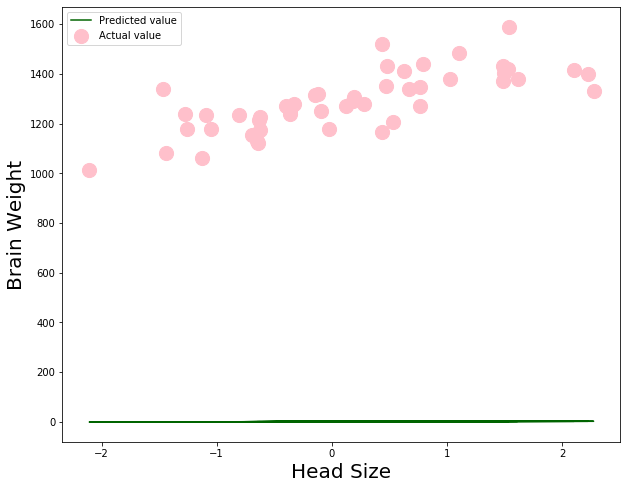

In [59]:
plt.figure(figsize=(10, 8))

plt.scatter(x_test, y_test, s=200, c='pink', label='Actual value')
plt.plot(x_test, y_pred, label='Predicted value', c='darkgreen')

plt.xlabel('Head Size', fontsize=20)
plt.ylabel('Brain Weight', fontsize=20)

plt.legend()

plt.show()

In [60]:
r2_score(y_test, y_pred)

-114.07078545479531